# <font color='red'>Backpropagation</font>


In this project, you will implement Backpropagation from scratch. You will then verify the correctness of the your implementation using a "grader" function/cell (provided by us) which will match your implmentation.

The grader fucntion would help you validate the correctness of your code. 


## <font color='red'>Loading data </font>

In [1]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import math

with open('C:\\Users\\Administrator\\Downloads\\data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


In [2]:
import platform
platform.architecture()

('64bit', 'WindowsPE')

<font color='blue'><b>Check this video for better understanding of the computational graphs and back propagation</font>

In [3]:
from IPython.display import YouTubeVideo
#YouTubeVideo('i94OvYb6noo',width="1000",height="500")

# <font color='red'>Computational graph</font>

<img src='https://i.imgur.com/seSGbNS.png'>


*  **If you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]**.<br><br>
*  **The final output of this graph is a value L which is computed as (Y-Y')^2** 

## <font color='red'>Task 1: Implementing Forward propagation, Backpropagation and Gradient checking </font>

# <font color='red'>Task 1.1 </font>

## <font color='blue'>Forward propagation </font>


*  <b>
    Forward propagation</b>(Write your code in<font color='blue'> def forward_propagation()</b></font>)<br><br>
    For easy debugging, we will break the computational graph into 3 parts.

    <font color='green'><b>Part 1</b></font></b>
    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <font color='green'><b>Part 2</b></font></b><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <font color='green'><b>Part 3</b></font></b>
    <img src='https://i.imgur.com/vMyCsd9.png'>

In [4]:
import math
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    # we can use this function in forward and backward propagation
    # write the code to compute the sigmoid value of z and return that value 
    sigm =  1 / (1 + math.exp(-z))
    return sigm

In [5]:
def grader_sigmoid(z):
    #if you have written the code correctly then the grader function will output true
    val=sigmoid(z)
    assert(val==0.8807970779778823)
    return True
grader_sigmoid(2)

True

In [6]:
def sigmoid_derivative(x):
    res=x * (1 - x)
    return res

In [7]:
import numpy as np

def forward_propagation(x, y, w):
        '''In this function, we will compute the forward propagation '''
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph,..., W[8] corresponds to w9 in graph.  
        # you have to return the following variables
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        # we are computing one of the values for better understanding
        
        val_1= (w[0]*x[0]+w[1]*x[1]) * (w[0]*x[0]+w[1]*x[1]) + w[5]
        part_1 = np.exp(val_1)
        val_2= part_1 + w[6]
        part_2 = np.tanh(val_2)
        part_3 = ((np.sin(w[2]*x[2]))*((w[3]*x[3])+(w[4]*x[4])))+w[7]
        
        y_pred=part_2+(sigmoid(part_3)*w[8])
        y_true = y
        
        # after computing part1,part2 and part3 compute the value of y' from the main Computational graph using required equations
        # write code to compute the value of L=(y-y')^2 and store it in variable loss
        # compute derivative of L  w.r.to y' and store it in dy_pred 
        # Create a dictionary to store all the intermediate values i.e. dy_pred ,loss,exp,tanh,sigmoid
        # we will be using the dictionary to find values in backpropagation, you can add other keys in dictionary as well
        
        forward_dict={}
        forward_dict['exp']= part_1
        forward_dict['sigmoid'] =sigmoid(part_3)
        forward_dict['tanh'] =part_2
        forward_dict['loss'] =pow((y_true-y_pred),2)
        forward_dict['dy_pred'] = -2*(y_true-y_pred)
        
        return forward_dict

In [8]:
def grader_forwardprop(data):
    dl = (data['dy_pred']==-1.9285278284819143)
    loss=(data['loss']==0.9298048963072919)
    part1=(data['exp']==1.1272967040973583)
    part2=(data['tanh']==0.8417934192562146)
    part3=(data['sigmoid']==0.5279179387419721)
    assert(dl and loss and part1 and part2 and part3)
    return True
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
grader_forwardprop(d1)

True

# <font color='red'>Task 1.2 </font>

## <font color='blue'>Backward propagation</font>

In [9]:
def backward_propagation(x,y,w,forward_dict):
    '''In this function, we will compute the backward propagation '''
    # forward_dict: the outputs of the forward_propagation() function
    
    #loss_derivative * (1-tanh^2)
    derivative7 = forward_dict['dy_pred']*(1-(math.pow(forward_dict['tanh'],2)))
    
    #As there is no mathematical function so simple math will do this
    derivative9= forward_dict['dy_pred']*forward_dict['sigmoid']
    
    #loss_derivative*(sigmoid)*(1-sigmoid)*w9  as w9 is stored in w[8]
    derivative8 = derivative9*(1-forward_dict['sigmoid'])*w[8]
    
    #derivative8*derivative of(sin(w3*x3)*((w4*x4)+(w5*x5))
    derivative3 =derivative8 *math.cos(x[2]*w[2]) * ((w[3]*x[3])+(w[4]*x[4])) * x[2]
    
    #derivative8 *derivative of(sin(w3*x3)*((w4*x4)+(w5*x5)) wrt w4
    derivative4 =derivative8 *math.sin(x[2]*w[2]) * x[3]
    
    #derivative8 *derivative of(sin(w3*x3)*((w4*x4)+(w5*x5)) wrt w5
    derivative5 =derivative8 *math.sin(x[2]*w[2]) * x[4]
    
    #derivative7*derivative of(e(forward_dict[exp]))
    derivative6 = derivative7*forward_dict["exp"]
    
    #derivative6*derivative of (((w[0]*x[0])+(w[1]*x[1])^2)) wrt w1
    derivative1 = derivative6 * 2 * ((w[0]*x[0])+(w[1]*x[1])) * x[0]
    
    #derivative6*derivative of (((w[0]*x[0])+(w[1]*x[1])^2)) wrt w2
    derivative2 = derivative6 * 2 * ((w[0]*x[0])+(w[1]*x[1])) * x[1]
    
    backward_dict={}
    backward_dict['dw1'] = derivative1
    backward_dict['dw2'] = derivative2
    backward_dict['dw3'] = derivative3
    backward_dict['dw4'] = derivative4
    backward_dict['dw5'] = derivative5
    backward_dict['dw6'] = derivative6
    backward_dict['dw7'] = derivative7
    backward_dict['dw8'] = derivative8
    backward_dict['dw9'] = derivative9
    #store the variables dw1,dw2 etc. in a dict as backward_dict['dw1']= dw1,backward_dict['dw2']= dw2...
    
    
    return backward_dict

In [10]:
def grader_backprop(data):
    dw1=(np.round(data['dw1'],6)==-0.229733)
    dw2=(np.round(data['dw2'],6)==-0.021408)
    dw3=(np.round(data['dw3'],6)==-0.005625)
    dw4=(np.round(data['dw4'],6)==-0.004658)
    dw5=(np.round(data['dw5'],6)==-0.001008)
    dw6=(np.round(data['dw6'],6)==-0.633475)
    dw7=(np.round(data['dw7'],6)==-0.561942)
    dw8=(np.round(data['dw8'],6)==-0.048063)
    dw9=(np.round(data['dw9'],6)==-1.018104)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 
w=np.ones(9)*0.1
forward_dict=forward_propagation(X[0],y[0],w)
backward_dict=backward_propagation(X[0],y[0],w,forward_dict)
grader_backprop(backward_dict)

True

# <font color='red'>Task 1.3 </font>

 ## <font color='blue'>Gradient clipping</font>

<b> Check this  <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> for more details on Gradient clipping

 we know that the derivative of any function is
 
 $$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$


*  The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

*  In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of <b>gradient checking!</b>

## <Font color='blue'>Gradient checking example</font>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

from the above function , lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}


## <font color='red'> Implement Gradient checking </font> <br>
 (Write your code in <font color='blue'> def gradient_checking()</font>)

**Algorithm** 



<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):<font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()</font>
    approx_gradients = []
    for each wi weight value in W:<font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi</font>
        approx_gradients.append(approximation gradients of weight wi)<font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with <br>  gradient_check formula</font>
    return gradient_check</font>
<b>NOTE: you can do sanity check by checking all the return values of gradient_checking(),<br> they have to be zero. if not you have bug in your code
</pre></b>

In [11]:
def gradient_checking(x,y,w,eps):
    # compute the dict value using forward_propagation()
    # compute the actual gradients of W using backword_propagation()
    forward_dict=forward_propagation(x,y,w)
    backward_dict=backward_propagation(x,y,w,forward_dict)
    
    #we are storing the original gradients for the given datapoints in a list
    
    original_gradients_list=list(backward_dict.values())
    # make sure that the order is correct i.e. first element in the list corresponds to  dw1 ,second element is dw2 etc.
    # you can use reverse function if the values are in reverse order
    
    approx_gradients_list=[]
    
     #now we have to write code for approx gradients, here you have to make sure that you update only one weight at a time
    for i in range(len(w)):
        #ONLY ONE WEIGHT IS UPDATING AT A SINGLE LOOP
        w1=w.copy()
        w2=w.copy()
        w1[i]=w1[i] + eps
        plusEpsilon = forward_propagation(x,y,w1)
        lossPlus = plusEpsilon['loss']
        
        w2[i]=w2[i] - eps
        negativeEpsilon = forward_propagation(x,y,w2)
        lossNegative = negativeEpsilon['loss']
        
        #approx_value = (lossPlus-lossNegative)/2*eps
        approx_gradients_list.append((lossPlus-lossNegative)/(2*eps))
        #performing gradient check operation
        
    numerator =np.linalg.norm(np.array(original_gradients_list)- np.array(approx_gradients_list))
    
    denominator =np.linalg.norm(np.array(original_gradients_list)+ np.array(approx_gradients_list))
    
    gradient_check_value = numerator/denominator
    #gradient_check_value =(np.array(original_gradients_list)-np.array(approx_gradients_list))/(np.array(original_gradients_list)+np.array(approx_gradients_list))
    return gradient_check_value
    

In [12]:
def grader_grad_check(value):
    print(value)
    assert(np.all(value <= 10**-3))
    return True 

w=[ 0.00271756,  0.01260512,  0.00167639, -0.00207756,  0.00720768,
   0.00114524,  0.00684168,  0.02242521,  0.01296444]

eps=10**-7
value= gradient_checking(X[0],y[0],w,eps)

#print(value)
grader_grad_check(value)

1.3223581946592619e-09


True

# <font color='red'> Task 2 : Optimizers </font>

* As a part of this task, you will be implementing 2  optimizers(methods to update weight)
* Use the same computational graph that was mentioned above to do this task
* The weights have been initialized from normal distribution with mean=0 and std=0.01. The initialization of weights is very important otherwiswe you can face vanishing gradient and exploding gradients problem.

**Check below video for reference purpose**

In [13]:
from IPython.display import YouTubeVideo
#YouTubeVideo('gYpoJMlgyXA',width="1000",height="500")

<font color='blue'><b>Algorithm</b>

<pre>
    for each epoch(1-20):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  
</pre>

## <font color='red'> Implement below tasks</b>


*  <b>Task 2.1</b>: you will be implementing the above algorithm with <b>Vanilla update</b> of weights<br><br>
*  <b>Task 2.2</b>: you will be implementing the above algorithm with <b>Momentum update</b> of weights<br><br>
*  <b>Task 2.3</b>: you will be implementing the above algorithm with <b>Adam update</b> of weights<br><br>


**Note : If you get any assertion error while running grader functions, please print the variables in grader functions and check which variable is returning False .Recheck your logic for that variable .**

### <font color='blue'>2.1 Algorithm with Vanilla update of weights</font>

In [63]:
mean_=0
std_=0.01

w = np.random.normal(mean_,std_,9)
#w_new = np.random.normal(0, 0.01, 9)
print(w)
#print(w_new)

[-0.01451329  0.00902425 -0.00780801 -0.01799164  0.00558944 -0.02269501
  0.01795887  0.00811222 -0.01588065]


In [64]:
X = data[:, :5]
y = data[:, -1]

In [65]:
from sklearn.metrics import mean_squared_error 
learning_rate =0.001
LvInVanilla=[]
epochInVanilla =[]

for i in range(1000):
    epochInVanilla.append(i)
    y_pred=[]
    for point in range(len(data)):
        forward_dict=forward_propagation(X[point],y[point],w)
        backward_dict=backward_propagation(X[point],y[point],w,forward_dict)
        y_pred.append(forward_dict['dy_pred'])
        w[0]=w[0]-learning_rate*backward_dict["dw1"]
        w[1]=w[1]-learning_rate*backward_dict["dw2"]
        w[2]=w[2]-learning_rate*backward_dict["dw3"]
        w[3]=w[3]-learning_rate*backward_dict["dw4"]
        w[4]=w[4]-learning_rate*backward_dict["dw5"]
        w[5]=w[5]-learning_rate*backward_dict["dw6"]
        w[6]=w[6]-learning_rate*backward_dict["dw7"]
        w[7]=w[7]-learning_rate*backward_dict["dw8"]
        w[8]=w[8]-learning_rate*backward_dict["dw9"]
    loss=mean_squared_error(y,y_pred)
    LvInVanilla.append(loss)
    
print(LvInVanilla)
#print(epochInVanilla)

#for _ in range(n_iter):
#        diff = -learn_rate * gradient(vector)
#        vector += diff
#        return vector

[12.026235502250184, 8.726151658925192, 6.8579230616969316, 5.627804425178191, 4.820699935438334, 4.303229200218243, 3.977434529496989, 3.77456714837813, 3.6490102038122485, 3.5715524113867283, 3.523847658063279, 3.4944901960292296, 3.4764267537643057, 3.4653080065099022, 3.4584561279164934, 3.4542237650563763, 3.451597866933652, 3.4499554588888723, 3.448913301640784, 3.4482354192203677, 3.447776245972585, 3.447445678969062, 3.447187594850188, 3.446966639674472, 3.4467601004114523, 3.4465528967457666, 3.4463344879634907, 3.446096954337355, 3.4458337979176754, 3.44553918303827, 3.4452074446197267, 3.4448327585899805, 3.4444089094825685, 3.443929115373303, 3.4433858858393185, 3.4427708983013976, 3.442074884243586, 3.4412875208168594, 3.440397326113053, 3.4393915584981474, 3.4382561221746846, 3.436975482829537, 3.435532598961849, 3.4339088763648546, 3.432084155294798, 3.430036742091207, 3.427743499348368, 3.4251800110370696, 3.422320841003305, 3.419139904674239, 3.415610974090547, 3.41170

In [17]:
#print(dict(zip(epochInVanilla,LvInVanilla)))

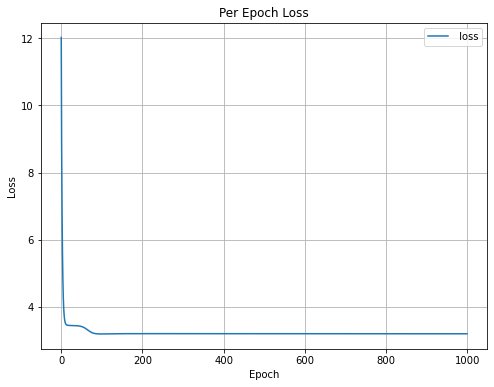

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(epochInVanilla,LvInVanilla, label=' loss')
plt.title("Per Epoch Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

## Loss is almost stangant after 175 epoch so let's run the above code for 175 epoch

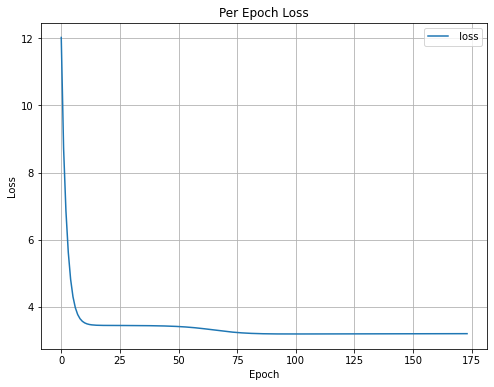

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(epochInVanilla[:174],LvInVanilla[:174], label=' loss')
plt.title("Per Epoch Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

### <font color='blue'>2.2 Algorithm with Momentum update of weights</font>

<img src='https://i.imgur.com/gyPSXhS.png'>

In [60]:
from sklearn.metrics import mean_squared_error 
learning_rate =0.001
mean_=0
std_=0.01

w = np.random.normal(mean_,std_,9)

LvInMomentum=[]
epochInMomentum =[]
gamma=0.001
for i in range(1000):
    epochInMomentum.append(i)
    y_pred=[]
    for point in range(len(data)):
        forward_dict=forward_propagation(X[point],y[point],w)
        backward_dict=backward_propagation(X[point],y[point],w,forward_dict)
        y_pred.append(forward_dict['dy_pred'])
        v0 = gamma*0 + learning_rate*backward_dict["dw1"]
        w[0]=w[0]-v0
        v1 = gamma*v0 + learning_rate*backward_dict["dw2"]
        w[1]=w[1]-v1
        v2 = gamma*v1 + learning_rate*backward_dict["dw3"]
        w[2]=w[2]-v2
        v3 = gamma*v2 + learning_rate*backward_dict["dw4"]
        w[3]=w[3]-v3
        v4 = gamma*v3 + learning_rate*backward_dict["dw5"]
        w[4]=w[4]-v4
        v5 = gamma*v4 + learning_rate*backward_dict["dw6"]
        w[5]=w[5]-v5
        v6 = gamma*v5 + learning_rate*backward_dict["dw7"]
        w[6]=w[6]-v6
        v7 = gamma*v6 + learning_rate*backward_dict["dw8"]
        w[7]=w[7]-v7
        v8 = gamma*v7 + learning_rate*backward_dict["dw9"]
        w[8]=w[8]-v8
        
    loss=mean_squared_error(y,y_pred)
    LvInMomentum.append(loss)
    
print(LvInMomentum)
#print(epochInVanilla)

#for _ in range(n_iter):
#        diff = -learn_rate * gradient(vector)
#        vector += diff
#        return vector

[11.855575779140802, 8.59216755345249, 6.763335321530481, 5.564127237112324, 4.779507419544311, 4.277291148763896, 3.96136108187141, 3.7646981050015307, 3.6429865769027123, 3.5678947762138917, 3.521641081691286, 3.4931729984608406, 3.4756555807068703, 3.4648735960759494, 3.458231318711309, 3.4541315958196233, 3.4515920699367317, 3.4500085580636206, 3.4490093635578796, 3.448365646537757, 3.4479363062509245, 3.4476340930275917, 3.44740477260907, 3.4472143125030636, 3.4470409972691867, 3.4468705713181214, 3.4466932405126904, 3.446501814233924, 3.4462905463613094, 3.4460544037044243, 3.445788594943771, 3.4454882573747625, 3.4451482382430516, 3.4447629317654873, 3.4443261479248584, 3.4438309984239317, 3.443269791014139, 3.442633927154431, 3.441913800462951, 3.4410986952351736, 3.4401766857608522, 3.439134538500234, 3.4379576205285414, 3.436629819126887, 3.435133479055238, 3.433449365924373, 3.4315566661910224, 3.4294330365921977, 3.427054718210194, 3.424396732639473, 3.421433179627184, 3.41

Here Gamma referes to the momentum coefficient, eta is leaning rate and v_t is moving average of our gradients at timestep t

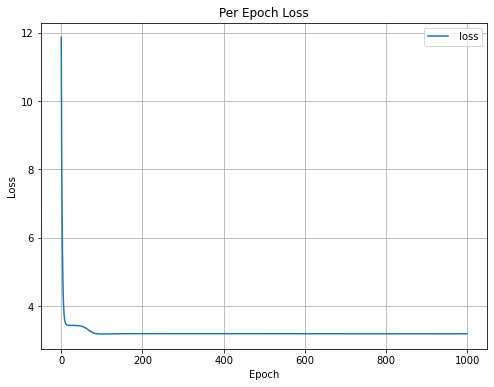

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(epochInMomentum,LvInMomentum, label=' loss')
plt.title("Per Epoch Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

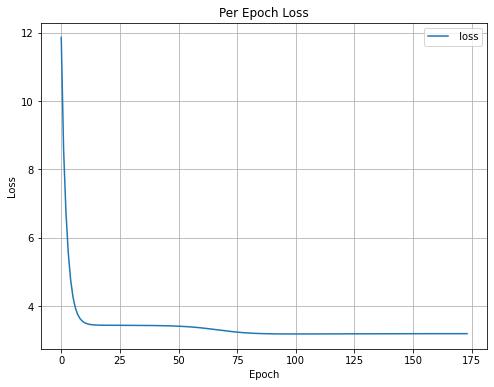

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(epochInMomentum[:174],LvInMomentum[:174], label=' loss')
plt.title("Per Epoch Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

### <font color='blue'>2.3 Algorithm with Adam update of weights</font>

<img src='https://i.imgur.com/GDR8UFP.jpg'>

In [73]:
mean=[0.0 for _ in range(data.shape[0])]
variance=[0.0 for _ in range(data.shape[0])]
#print(mean)
#print(variance)
mean_=0
std_=0.01

w = np.random.normal(mean_,std_,9)

In [74]:
from sklearn.metrics import mean_squared_error 
learning_rate =0.001
beta1=0.90
beta2=0.99
epsilion=1e-8
LossInAdam=[]
epochInAdam=[]


#gamma=0.001
for i in range(1000):
    epochInAdam.append(i)
    y_pred=[]
    loss=[]
    for point in range(len(data)):
        forward_dict=forward_propagation(X[point],y[point],w)
        backward_dict=backward_propagation(X[point],y[point],w,forward_dict)
        y_pred.append(forward_dict['dy_pred'])
        
        grads = np.array(list(backward_dict.values()))
        
        mean[point]=beta1*mean[point]+(1-beta1)*grads
        mean_update =mean[point]/(1-(beta1)**(point+1))
        
        variance[point]=beta2*variance[point]+((1-beta2)*(grads**2))
        variance_update =variance[point]/(1-(beta2)**(point+1))
        
        w-=((learning_rate)/((np.sqrt(variance_update))+epsilion))*mean_update
        loss.append(forward_dict['loss'])
    
    LossInAdam.append(sum(loss)/len(loss))
    
print(LossInAdam)
#print(epochInVanilla)

#for _ in range(n_iter):
#        diff = -learn_rate * gradient(vector)
#        vector += diff
#        return vector

[0.6432106640469625, 0.13010633987989975, 0.026893225267827447, 0.10448066316881174, 0.07697194862894755, 0.024133871581361325, 0.018168286095100333, 0.018096529284142383, 0.007948051327050717, 0.004351217760684326, 0.007522695174958948, 0.008970066172227996, 0.007158722861133719, 0.004958539533024579, 0.003810517239636915, 0.0030690230963786517, 0.0023348484260371587, 0.002079889392160732, 0.002469964467279119, 0.0029702292415607133, 0.003081223789411406, 0.002771151343960511, 0.0022486633800836197, 0.001697467363077264, 0.0012278570641555938, 0.0008966775538975777, 0.0007072749211667353, 0.0006186752712716201, 0.0005775661781039646, 0.0005452722703856659, 0.0005027268304365214, 0.0004440911717734407, 0.0003721692891124109, 0.00029601008309616014, 0.00022678539497174725, 0.00017279236946528344, 0.00013685642692165542, 0.00011687964972318827, 0.00010790633554123399, 0.00010426208321037795, 0.00010123244710965392, 9.602881550543084e-05, 8.791254777718594e-05, 7.767795458665119e-05, 6.68

In [68]:
'''

from sklearn.metrics import mean_squared_error 
learning_rate =0.001
beta1=0.90
beta2=0.99
epsilion=1e-8
LvInAdaGrad=[]
epochInAdaGrad =[]

#gamma=0.001
for i in range(1000):
    epochInAdaGrad.append(i)
    y_pred=[]
    
    for point in range(len(data)):
        forward_dict=forward_propagation(X[point],y[point],w)
        backward_dict=backward_propagation(X[point],y[point],w,forward_dict)
        y_pred.append(forward_dict['dy_pred'])
        
        
        
        m[0]=beta1*m[0]+(1-beta1)*backward_dict["dw1"]
        mt0=m[0]/(1-beta1)
        v[0]=beta2*v[0]+(1-beta2)*math.pow(backward_dict["dw1"],2)
        vt0=v[0]/(1-beta2)
        w[0]=w[0]-(learning_rate/(math.sqrt(vt0+epsilion)))*mt0
        
        m[1]=beta1*m[0]+(1-beta1)*backward_dict["dw2"]
        mt1=m[1]/(1-beta1)
        v[1]=beta2*v[0]+(1-beta2)*math.pow(backward_dict["dw2"],2)
        vt1=v[1]/(1-beta2)
        w[1]=w[1]-(learning_rate/(math.sqrt(vt1+epsilion)))*mt1
        
        m[2]=beta1*m[1]+(1-beta1)*backward_dict["dw3"]
        mt2=m[2]/(1-beta1)
        v[2]=beta2*v[1]+(1-beta2)*math.pow(backward_dict["dw3"],2)
        vt2=v[2]/(1-beta2)
        w[2]=w[2]-(learning_rate/(math.sqrt(vt2+epsilion)))*mt2
        
        m[3]=beta1*m[2]+(1-beta1)*backward_dict["dw4"]
        mt3=m[3]/(1-beta1)
        v[3]=beta2*v[2]+(1-beta2)*math.pow(backward_dict["dw4"],2)
        vt3=v[3]/(1-beta2)
        w[3]=w[3]-(learning_rate/(math.sqrt(vt3+epsilion)))*mt3
        
        m[4]=beta1*m[3]+(1-beta1)*backward_dict["dw5"]
        mt4=m[4]/(1-beta1)
        v[4]=beta2*v[3]+(1-beta2)*math.pow(backward_dict["dw5"],2)
        vt4=v[4]/(1-beta2)
        w[4]=w[4]-(learning_rate/(math.sqrt(vt4+epsilion)))*mt4
        
        m[5]=beta1*m[4]+(1-beta1)*backward_dict["dw6"]
        mt5=m[5]/(1-beta1)
        v[5]=beta2*v[4]+(1-beta2)*math.pow(backward_dict["dw6"],2)
        vt5=v[5]/(1-beta2)
        w[5]=w[5]-(learning_rate/(math.sqrt(vt5+epsilion)))*mt5
        
        m[6]=beta1*m[5]+(1-beta1)*backward_dict["dw7"]
        mt6=m[6]/(1-beta1)
        v[6]=beta2*v[5]+(1-beta2)*math.pow(backward_dict["dw7"],2)
        vt6=v[6]/(1-beta2)
        w[6]=w[6]-(learning_rate/(math.sqrt(vt6+epsilion)))*mt6
        
        m[7]=beta1*m[6]+(1-beta1)*backward_dict["dw8"]
        mt7=m[7]/(1-beta1)
        v[7]=beta2*v[6]+(1-beta2)*math.pow(backward_dict["dw8"],2)
        vt7=v[7]/(1-beta2)
        w[7]=w[7]-(learning_rate/(math.sqrt(vt7+epsilion)))*mt7
        
        m[8]=beta1*m[7]+(1-beta1)*backward_dict["dw9"]
        mt8=m[8]/(1-beta1)
        v[8]=beta2*v[7]+(1-beta2)*math.pow(backward_dict["dw9"],2)
        vt8=v[7]/(1-beta2)
        w[8]=w[8]-(learning_rate/(math.sqrt(vt8+epsilion)))*mt8
        
    loss=mean_squared_error(y,y_pred)
    LvInAdaGrad.append(loss)
    
print(LvInAdaGrad)
#print(epochInVanilla)

#for _ in range(n_iter):
#        diff = -learn_rate * gradient(vector)
#        vector += diff
#        return vector

'''
#redundant Code

'\n\nfrom sklearn.metrics import mean_squared_error \nlearning_rate =0.001\nbeta1=0.90\nbeta2=0.99\nepsilion=1e-8\nLvInAdaGrad=[]\nepochInAdaGrad =[]\n\n#gamma=0.001\nfor i in range(1000):\n    epochInAdaGrad.append(i)\n    y_pred=[]\n    \n    for point in range(len(data)):\n        forward_dict=forward_propagation(X[point],y[point],w)\n        backward_dict=backward_propagation(X[point],y[point],w,forward_dict)\n        y_pred.append(forward_dict[\'dy_pred\'])\n        \n        \n        \n        m[0]=beta1*m[0]+(1-beta1)*backward_dict["dw1"]\n        mt0=m[0]/(1-beta1)\n        v[0]=beta2*v[0]+(1-beta2)*math.pow(backward_dict["dw1"],2)\n        vt0=v[0]/(1-beta2)\n        w[0]=w[0]-(learning_rate/(math.sqrt(vt0+epsilion)))*mt0\n        \n        m[1]=beta1*m[0]+(1-beta1)*backward_dict["dw2"]\n        mt1=m[1]/(1-beta1)\n        v[1]=beta2*v[0]+(1-beta2)*math.pow(backward_dict["dw2"],2)\n        vt1=v[1]/(1-beta2)\n        w[1]=w[1]-(learning_rate/(math.sqrt(vt1+epsilion)))*mt1\n  

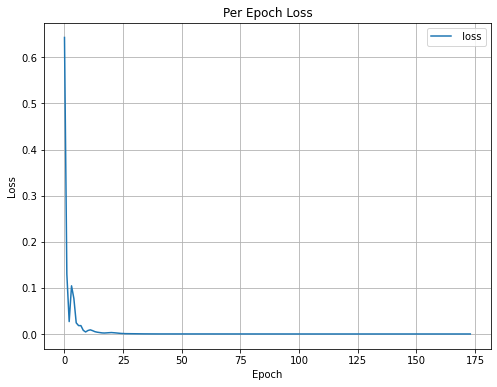

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(epochInAdam[:174],LossInAdam[:174], label=' loss')
plt.title("Per Epoch Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

<font color='blue'>Comparision plot between epochs and loss with different optimizers. Make sure that loss is conerging with increaing epochs</font>

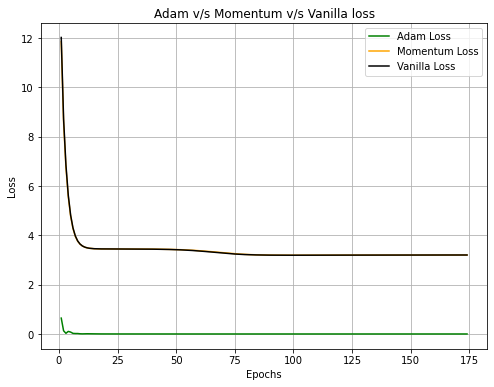

In [79]:
AdamLoss=LossInAdam[:174]
VanillaLoss=LvInVanilla[:174]
MomentumLoss= LvInMomentum[:174]
plt.figure(figsize=(8,6))
plt.grid()
epochs = range(1,175)
plt.plot(epochs, AdamLoss, 'g', label='Adam Loss')
plt.plot(epochs, MomentumLoss, 'orange', label='Momentum Loss')
plt.plot(epochs, VanillaLoss, 'black', label='Vanilla Loss')
plt.title('Adam v/s Momentum v/s Vanilla loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<font color='blue'><b>You can go through the following blog to understand the implementation of other optimizers .</font>
   <br> [Gradients update blog](https://cs231n.github.io/neural-networks-3/) </br>